In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, load_breast_cancer
import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

### 성과분석

In [2]:
x_data = np.array( [ [25.8], [26.6], [28.1], [29.0], [30.5], [31.0], [33.6], [39.3], [43.3], [45.8] ] )
y_data = np.array( [ [1],[0],[0],[1],[1],[1],[1],[0],[0],[1] ] )

In [3]:
df             = pd.DataFrame( x_data, columns=['BMI'] )
df['당뇨유무'] = y_data                                  # 0이 정상, 1이 당뇨
df.head()

,BMI,당뇨유무
0,25.8,1
1,26.6,0
2,28.1,0
3,29.0,1
4,30.5,1


- Confusion matrix

|          | **Negative** | **Positive** |           |
|:--------:|:--------:     |:--------------:| :--------:|
|  **Negative** | TN(0, 0)  | FP(1, 0) : Type 1 error  | Specificity   |
| **Positive** | FN(0, 1)  : Type 2 error  | TP(1, 1)  |   Sensitivity |
| | Negative predictive value | Positive predictive valuey  |         |

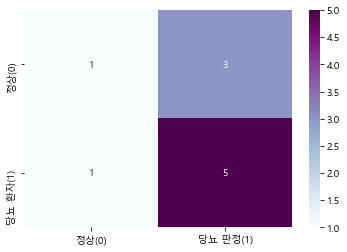

실제 : [[1 0 0 1 1 1 1 0 0 1]]
예측 : [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [4]:
y_pred = [ 0, 0, 1, 1, 1, 1, 1, 1, 1, 1 ]
CM     = metrics.confusion_matrix( y_data, y_pred )
sns.heatmap( CM, annot=True, cmap='BuPu', xticklabels=[ '정상(0)', '당뇨 판정(1)'], yticklabels=[ '정상(0)', '당뇨 환자(1)' ] )
plt.show()
print( f'실제 : {y_data.T}' )
print( f'예측 : {y_pred}'   )

- 특이도(Specificity)

$$
{Specificity} = \frac {TN} {TN + FP}
$$

In [5]:
Specificity = 1 /(1+3)
Specificity

0.25

 - FPR(False Positive Rate) : 0인 케이스에 대한 1로 잘못 예측한 비율
    
$$
{1 - Specificity} 
$$

In [6]:
1 - Specificity

0.75

- 정밀도(Precision) 

$$
{Precision} = \frac {TP} {TP + FP}
$$

In [7]:
precision = 5 / (5+3)
precision

0.625

In [8]:
metrics.precision_score( y_data, y_pred )

0.625

- 재현율(Recall) = 민감도(Sensitivity : True Positive Rate) : 1인 케이스에 대한 1로 예측한 비율

$$
{Recall} = {Sensitivity} = \frac {TP} {TP + FN}
$$

In [9]:
recall = 5/ (5+1)
recall

0.8333333333333334

In [10]:
metrics.recall_score( y_data, y_pred )

0.8333333333333334

- F1 score

$$
{F_1} = 2\times \frac {Precision \times Recall} {Precision  + Recall}
$$

In [11]:
metrics.f1_score( y_data, y_pred )

0.7142857142857143

 - ROC Curve(Receiver Operating Characteristic Curve) ==> metrics.roc_curve( y_data(train, test), Probabilty values ) <br><br>
 (1). ROC Curve란 가로축 FPR( 1- 특이도(Specificity) ) 값으로 두고, 세로축을 TPR(True Positive Rate, 민감도) 값으로 두어 시각화한 그래프<br><br>
 
 (2). 2진 분류에서 모형의 성능을 평가하기 위해 만히 사용되는 척도이다.<br><br>
 
 (3). 그래프가 왼쪽 상단에 가깜게 그려질수록 올바르게 예측한 비율은 높고 잘못 예측한 비율은 낮음을 의미한다. 따라서 ROC곡선 아래의 면적을 의미하는 AUROC(Area Under ROC) 값이 크면 클수록(1에 가까울수록) 모형의 성능이 좋다고 평가한다.<br><br>

- Reference : https://angeloyeo.github.io/2020/08/05/ROC.html

- AUROC를 이용한 성능 평가 기준

| Criterion | Evaluation |
|:--------: |:--------:  |
| 0.9 - 1.0   | Excellent  |
| 0.8 - 0.9   | Good  |
| 0.7 - 0.8   | Fair  |
| 0.6 - 0.7   | Poor  |
| 0.5 - 0.6   | Fail  |

- 문제: Pima indians data를 아용하여 Confusion matrix( Heatmat ), Precsion, recall, F1 score를 구하시오.

#### Code 한눈에 보기.

In [12]:
# 데이터 불러오기 및 처리
df     = pd.read_csv('data5/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, :-1]
y_data = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.25, stratify=y_data, random_state=7 )


# Train data set 적합.
model_logit       = make_pipeline( StandardScaler(),  LogisticRegression() )
param_value       = { 'logisticregression__penalty': [ 'l1','l2' ],
                      'logisticregression__C'      : np.logspace( -5, 5, 11 ),
                      'logisticregression__solver' : ['liblinear', 'saga' ]
                    }
grid_search_logit = GridSearchCV( model_logit , param_grid = param_value ) 
grid_search_logit.fit( x_train, y_train )


# Hitmap <==  y_test, model_logit.predict( x_test )
y_pred_train  = grid_search_logit.predict( x_train )
y_pred_test   = grid_search_logit.predict( x_test )
cm            = metrics.confusion_matrix( y_test, y_pred_test )
sns.heatmap( cm, annot=True, cmap='BuPu', xticklabels=[ '정상', '당뇨 판정'], yticklabels=[ '정상', '당뇨 환자' ] )
plt.show()


# Train data set을 통한 Resuit
print(f'Precision score of train data  : { round(metrics.precision_score( y_train, y_pred_train ), 3)*100 }%' )
print(f'Recall score of train data     : { round(metrics.recall_score( y_train, y_pred_train  ), 3)*100   }%' )
print(f'F1 score of train data         : { round(metrics.f1_score( y_train, y_pred_train  ), 3)*100       }%' )


# Test data set을 통한 Resuit
print(f'Precision score of test data  : { round(metrics.precision_score( y_test, y_pred_test ), 3)*100 }%' )
print(f'Recall score of test data     : { round(metrics.recall_score( y_test, y_pred_test  ), 3)*100   }%' )
print(f'F1 score of test data         : { round(metrics.f1_score( y_test, y_pred_test  ), 3)*100       }%' )


# ROC Curve(Receiver Operating Characteristic Curve)
proba       = grid_search_logit.predict_proba( x_test )
FPR, TPR, thresholds = metrics.roc_curve( y_test, proba[:,1] )
plt.plot( FPR, TPR, 'm--', label='logistic')
plt.plot( [0,1], [0,1], 'b--', label='guess' )
plt.xlabel( 'FPR : False Positive Rate, 1 - 특이도' ); plt.ylabel( 'TPR : True Positive Rate, 민감도' )
plt.legend()
plt.show()

In [13]:
df     = pd.read_csv('data5/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, :-1]
y_data = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.25, stratify=y_data, random_state=7 ) 

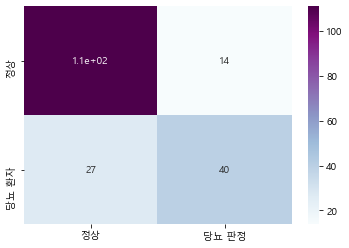

In [14]:
model_logit = make_pipeline( StandardScaler(),  LogisticRegression() )
param_value = { 'logisticregression__penalty': [ 'l1','l2' ],
                'logisticregression__C'      : np.logspace( -5, 5, 11 ),
                'logisticregression__solver' : ['liblinear', 'saga' ]
              }
grid_search_logit = GridSearchCV( model_logit , param_grid = param_value ) 
grid_search_logit.fit( x_train, y_train )

y_pred_test   = grid_search_logit.predict( x_test )
y_pred_train  = grid_search_logit.predict( x_train )
cm            = metrics.confusion_matrix( y_test, y_pred_test )
sns.heatmap( cm, annot=True, cmap='BuPu', xticklabels=[ '정상', '당뇨 판정'], yticklabels=[ '정상', '당뇨 환자' ] )
plt.show()

In [15]:
print(f'Precision score of train data  : { round(metrics.precision_score( y_train, y_pred_train ), 3)*100 }%' )
print(f'Recall score of train data     : { round(metrics.recall_score( y_train, y_pred_train  ), 3)*100   }%' )
print(f'F1 score of train data         : { round(metrics.f1_score( y_train, y_pred_train  ), 3)*100       }%' )

Precision score of train data  : 72.0%
Recall score of train data     : 56.2%
F1 score of train data         : 63.1%


In [16]:
print(f'Precision score of test data  : { round(metrics.precision_score( y_test, y_pred_test ), 3)*100 }%' )
print(f'Recall score of test data     : { round(metrics.recall_score( y_test, y_pred_test  ), 3)*100   }%' )
print(f'F1 score of test data         : { round(metrics.f1_score( y_test, y_pred_test  ), 3)*100       }%' )

Precision score of test data  : 74.1%
Recall score of test data     : 59.699999999999996%
F1 score of test data         : 66.10000000000001%


In [17]:
proba       = grid_search_logit.predict_proba( x_test )
rr          = pd.DataFrame( [ y_test ] ).T
rr['proba'] = proba[:,1]
rr

,Outcome,proba
408,1,0.912897
61,1,0.505899
531,0,0.299637
515,1,0.518993
595,1,0.648091
...,...,...
284,1,0.104364
475,0,0.178129
89,0,0.075850
115,1,0.458297


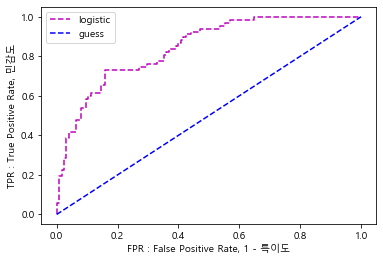

In [18]:
FPR, TPR, Thresholds = metrics.roc_curve( y_test, proba[:,1] )
plt.plot( FPR, TPR, 'm--', label='logistic')
plt.plot( [0,1], [0,1], 'b--', label='guess' )
plt.xlabel( 'FPR : False Positive Rate, 1 - 특이도' ); plt.ylabel( 'TPR : True Positive Rate, 민감도' )
plt.legend()
plt.show()